# Introduction

In [24]:
import tensorflow as tf

_Запустил TF на GPU_

In [25]:
devices = tf.config.list_physical_devices('GPU')
print(devices) 
print(len(devices)) 

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
1


In [26]:
tf.test.is_built_with_cuda()

True

In [27]:
tf.test.is_gpu_available()

True

In [28]:
result_gpu = tf.reduce_sum(tf.random.normal([1000, 1000]))
print("Результат на GPU:", result_gpu)


Результат на GPU: tf.Tensor(1043.471, shape=(), dtype=float32)


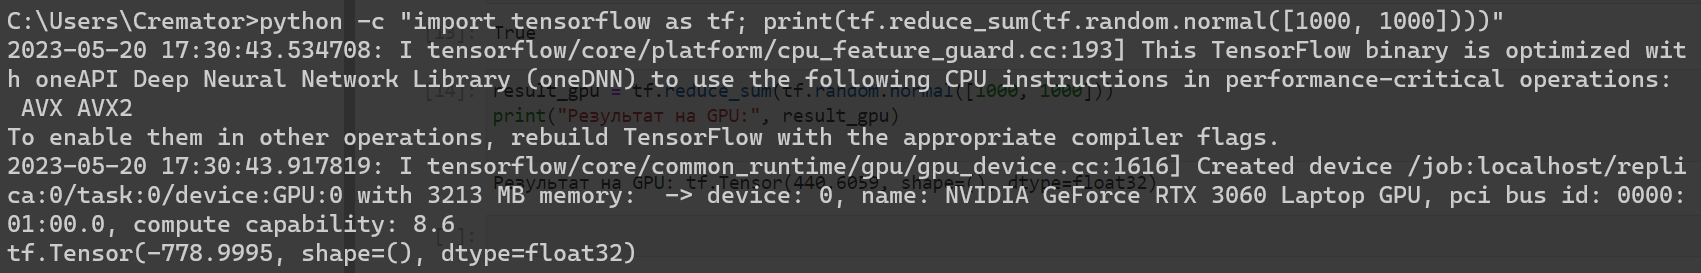

# 1. Load the digit dataset

In [29]:
import numpy as np
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import plot_model

np.random.seed(66)

## 1.1 Spliting data into train and test sets

In [30]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## 1.2 Checking the shape of the input data

In [31]:
print('x_train:\t{}' .format(X_train.shape))
print('y_train:\t{}' .format(y_train.shape))
print('x_test:\t\t{}'.format(X_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

x_train:	(60000, 28, 28)
y_train:	(60000,)
x_test:		(10000, 28, 28)
y_test:		(10000,)


## 1.3 Plot first 64 digit

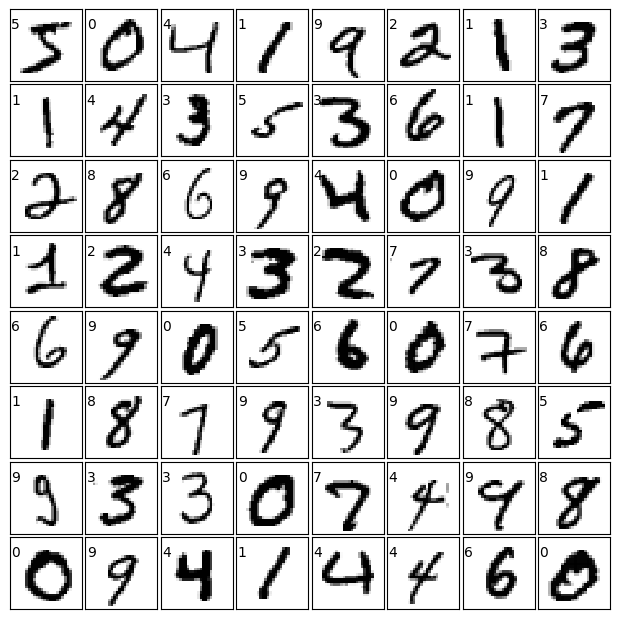

In [32]:
# set up the figure
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 28x28 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(y_train[i]))

In [33]:
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.
X_test /= 255.

print('X_train:\t{}' .format(X_train.shape),' -reshaped')
print('X_test: \t{}' .format(X_test.shape),' -reshaped')

X_train:	(60000, 28, 28, 1)  -reshaped
X_test: 	(10000, 28, 28, 1)  -reshaped


## 1.4 One Hot Encoding

In [34]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

# 2. Implementing a Neural Network

## 2.1 Hyperparameters

In [35]:
# Hyperparameters
training_epochs = 7 # Total number of training epochs
learning_rate = 0.002 # The learning rate

## 2.2 Create a model

In [36]:
# create a model
def create_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 batch_normalization_1 (Batc  (None, 5, 5, 32)         128       
 hNormalization)                                                 
                                                      

1. Сначала определена функция create_model(), которая создает модель.

2. Внутри функции create_model() создается объект модели Sequential(), который представляет собой линейную стековую модель.

3. Затем последовательно добавляются слои к модели с помощью метода add().

     - Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)) добавляет сверточный слой с 32 фильтрами размером 3x3, функцией активации ReLU и указывает входную форму данных (28, 28, 1) (где 1 - количество каналов, в данном случае один канал, так как изображения черно-белые).

     - MaxPooling2D((2, 2)) добавляет слой субдискретизации с размером пулинга 2x2, который уменьшает размерность пространственных размеров изображения.

     - Далее повторяются сверточный слой и слой субдискретизации для дальнейшего извлечения признаков.

     - BatchNormalization() добавляет слой нормализации пакета, который нормализует активации предыдущего слоя по среднему и дисперсии пакета для ускорения обучения и улучшения стабильности модели.

     - Flatten() преобразует выходные данные предыдущего слоя в одномерный вектор.

     - Dense(128, activation='relu') добавляет полносвязный слой с 128 нейронами и функцией активации ReLU.

plot_model(model, to_file='model.png', show_shapes=True)
- Dense(10, activation='softmax') добавляет выходной слой с 10 нейронами (по числу классов) и функцией активации softmax, которая преобразует выходные значения в вероятности принадлежности к каждому классу.

4. После добавления всех слоев, модель компилируется с помощью метода compile(). Здесь указывается оптимизатор Adam с заданной скоростью обучения (learning_rate), функция потерь categorical_crossentropy для многоклассовой классификации и метрика оценки точности (accuracy).

5. На выходе из функции create_model() возвращается созданная модель.

6. Затем созданная модель model выводится на экран с помощью метода summary(), который показывает сводку модели, включая количество параметров и размерность выходов каждого слоя.

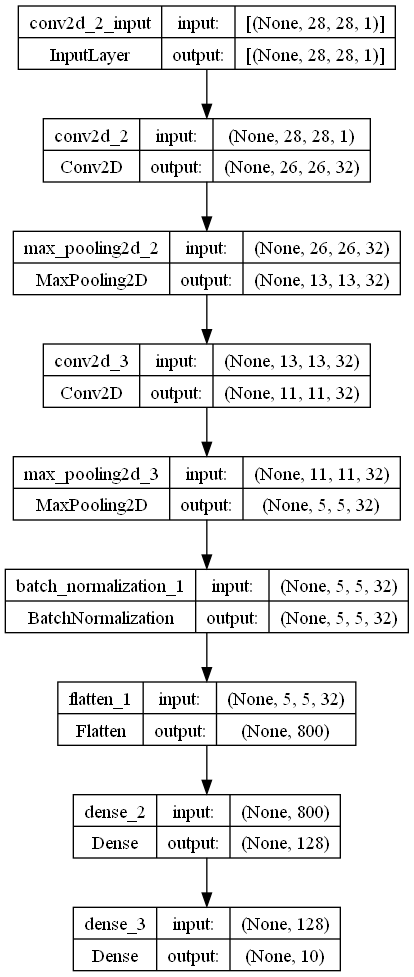

In [37]:
plot_model(model, to_file='model.png', show_shapes=True)

## 2.3 Train the model

In [38]:
results = model.fit(
    X_train, y_train,
    epochs= training_epochs,
    batch_size = 64,
    validation_data = (X_test, y_test),
    verbose = 2
)

Epoch 1/7
938/938 - 7s - loss: 0.0946 - accuracy: 0.9710 - val_loss: 0.0451 - val_accuracy: 0.9857 - 7s/epoch - 7ms/step
Epoch 2/7
938/938 - 5s - loss: 0.0397 - accuracy: 0.9877 - val_loss: 0.0413 - val_accuracy: 0.9875 - 5s/epoch - 6ms/step
Epoch 3/7
938/938 - 5s - loss: 0.0282 - accuracy: 0.9913 - val_loss: 0.0423 - val_accuracy: 0.9877 - 5s/epoch - 6ms/step
Epoch 4/7
938/938 - 5s - loss: 0.0212 - accuracy: 0.9931 - val_loss: 0.0501 - val_accuracy: 0.9863 - 5s/epoch - 6ms/step
Epoch 5/7
938/938 - 5s - loss: 0.0182 - accuracy: 0.9937 - val_loss: 0.0507 - val_accuracy: 0.9849 - 5s/epoch - 5ms/step
Epoch 6/7
938/938 - 6s - loss: 0.0164 - accuracy: 0.9950 - val_loss: 0.0464 - val_accuracy: 0.9898 - 6s/epoch - 6ms/step
Epoch 7/7
938/938 - 6s - loss: 0.0125 - accuracy: 0.9961 - val_loss: 0.0333 - val_accuracy: 0.9908 - 6s/epoch - 6ms/step


## 2.4 Test the model

Model can generate output predictions for the input samples.

In [39]:
prediction_values = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


## 2.5 Evaluate the model to see the accuracy

In [40]:
print("Evaluating on training set...")
(loss, accuracy) = model.evaluate(X_train,y_train, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))


print("Evaluating on testing set...")
(loss, accuracy) = model.evaluate(X_test, y_test, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Evaluating on training set...
loss=0.0067, accuracy: 99.7650%
Evaluating on testing set...
loss=0.0333, accuracy: 99.0800%


## 2.6 Summarize history for accuracy and loss

Maximum Loss : 0.0946
Minimum Loss : 0.0125
Loss difference : 0.0821


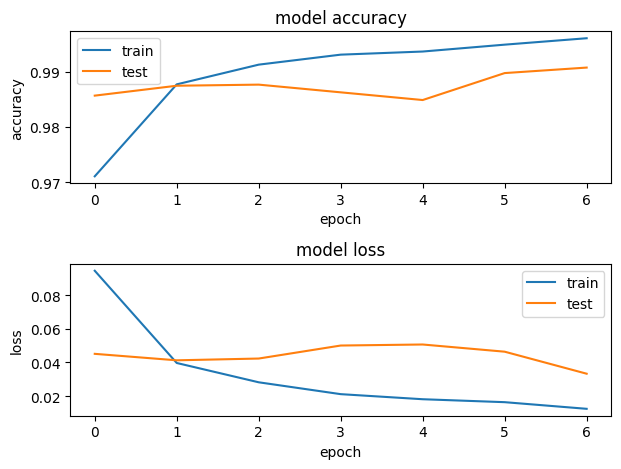

In [41]:
# summarize history for accuracy
plt.subplot(211)
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])

# summarize history for loss
plt.subplot(212)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.tight_layout()

max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("Minimum Loss : {:.4f}".format(min_loss))
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

## 2.7 Confusion matrix

313/313 [==============================] - 1s 3ms/step


Text(0.5, 23.52222222222222, 'Predicted')

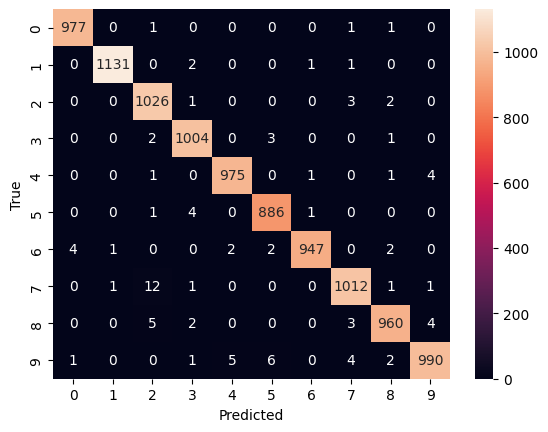

In [43]:
# Convert multilabel-indicator to single-label format
y_test_single_label = np.argmax(y_test, axis=1)

# Obtain predicted values
prediction_values = np.argmax(model.predict(X_test), axis=1)

# Compute confusion matrix
confusion_mtx = confusion_matrix(y_test_single_label, prediction_values)

# Visualize confusion matrix
sns.heatmap(confusion_mtx, annot=True, fmt="d")
plt.ylabel('True')
plt.xlabel('Predicted')

# 3. Visualization and Testing

## 3.1 Display the test set and predictions

313/313 [==============================] - 1s 3ms/step


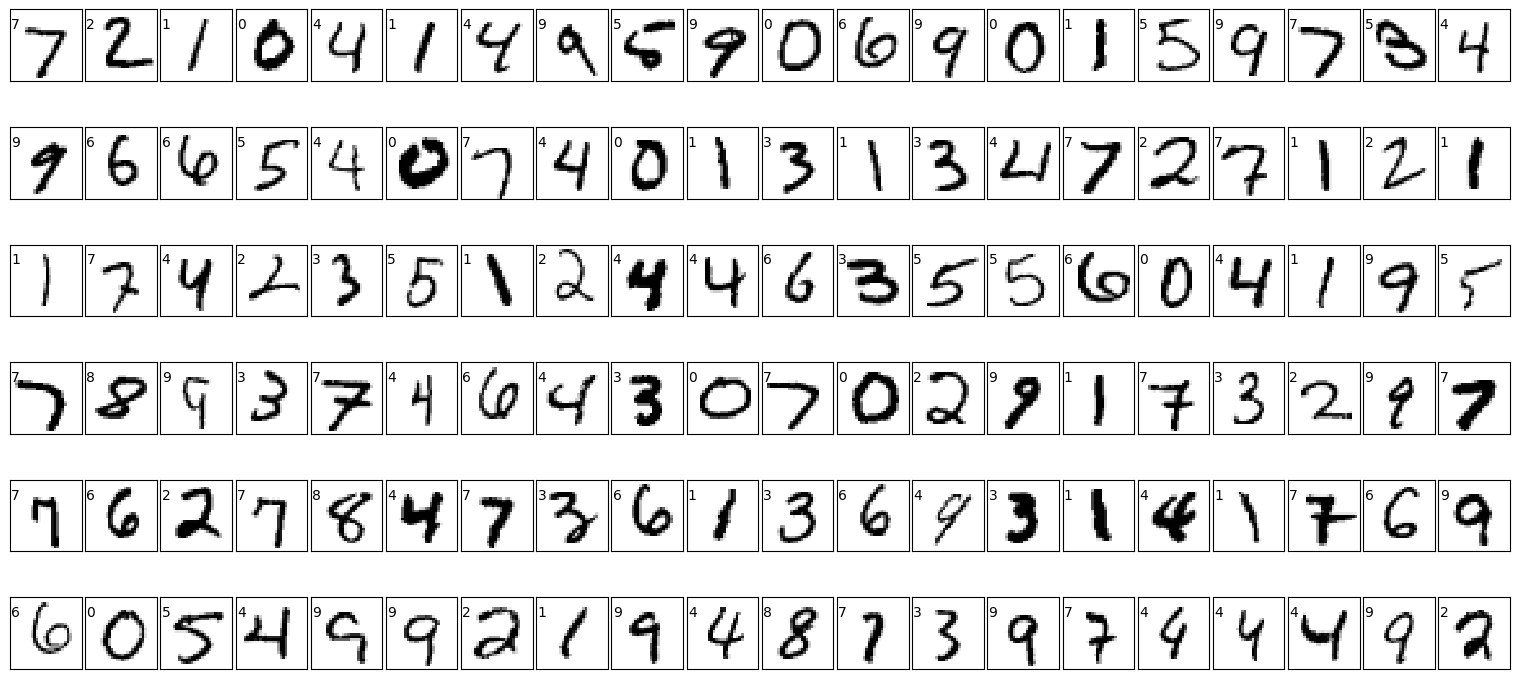

In [44]:
prediction_values = model.predict(X_test)

# set up the figure
fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(120):
    ax = fig.add_subplot(6, 20, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i,:].reshape((28,28)),cmap=plt.cm.gray_r, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(prediction_values[i].argmax()))


## 3.2 Save a model to JSON and HDF5

In [45]:
# save weights to HDF5
model.save_weights("CNN_tf.keras_mnist.h5")

# 4 Experiment

In [46]:
from tensorflow.keras.datasets import mnist

In [47]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [48]:
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.
X_test /= 255.

print('X_train:\t{}' .format(X_train.shape),' -reshaped')
print('X_test: \t{}' .format(X_test.shape),' -reshaped')

X_train:	(60000, 28, 28, 1)  -reshaped
X_test: 	(10000, 28, 28, 1)  -reshaped


In [49]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [50]:
# Hyperparameters
training_epochs = 10 # Total number of training epochs
learning_rate = 0.003 # The learning rate

In [51]:
# create a model
def create_model():
    model = Sequential()

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_model()
model.build((1, 28, 28, 1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (1, 784)                  0         
                                                                 
 dense_4 (Dense)             (1, 128)                  100480    
                                                                 
 dense_5 (Dense)             (1, 128)                  16512     
                                                                 
 dense_6 (Dense)             (1, 128)                  16512     
                                                                 
 dense_7 (Dense)             (1, 10)                   1290      
                                                                 
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


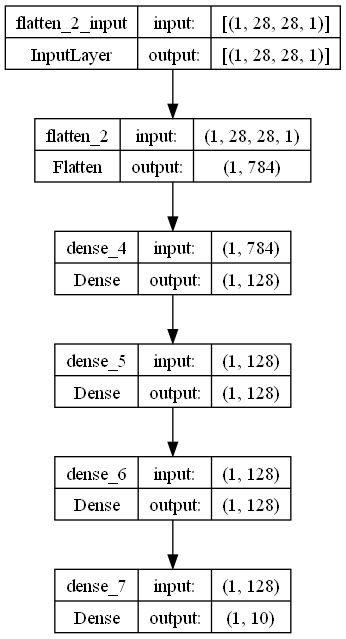

In [52]:
plot_model(model, to_file='model.png', show_shapes=True)

In [53]:
results = model.fit(
    X_train, y_train,
    epochs= training_epochs,
    batch_size = 64,
    validation_data = (X_test, y_test),
    verbose = 2
)

Epoch 1/10
938/938 - 5s - loss: 0.2218 - accuracy: 0.9330 - val_loss: 0.1142 - val_accuracy: 0.9622 - 5s/epoch - 6ms/step
Epoch 2/10
938/938 - 5s - loss: 0.1093 - accuracy: 0.9664 - val_loss: 0.1234 - val_accuracy: 0.9625 - 5s/epoch - 5ms/step
Epoch 3/10
938/938 - 5s - loss: 0.0829 - accuracy: 0.9753 - val_loss: 0.1091 - val_accuracy: 0.9681 - 5s/epoch - 5ms/step
Epoch 4/10
938/938 - 4s - loss: 0.0692 - accuracy: 0.9794 - val_loss: 0.1031 - val_accuracy: 0.9702 - 4s/epoch - 5ms/step
Epoch 5/10
938/938 - 4s - loss: 0.0596 - accuracy: 0.9815 - val_loss: 0.1080 - val_accuracy: 0.9721 - 4s/epoch - 5ms/step
Epoch 6/10
938/938 - 5s - loss: 0.0508 - accuracy: 0.9847 - val_loss: 0.1370 - val_accuracy: 0.9676 - 5s/epoch - 5ms/step
Epoch 7/10
938/938 - 4s - loss: 0.0463 - accuracy: 0.9859 - val_loss: 0.0885 - val_accuracy: 0.9773 - 4s/epoch - 5ms/step
Epoch 8/10
938/938 - 5s - loss: 0.0435 - accuracy: 0.9869 - val_loss: 0.1129 - val_accuracy: 0.9714 - 5s/epoch - 5ms/step
Epoch 9/10
938/938 - 5s 

In [54]:
prediction_values = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [55]:
print("Evaluating on training set...")
(loss, accuracy) = model.evaluate(X_train,y_train, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))


print("Evaluating on testing set...")
(loss, accuracy) = model.evaluate(X_test, y_test, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Evaluating on training set...
loss=0.0354, accuracy: 98.8450%
Evaluating on testing set...
loss=0.1233, accuracy: 97.2800%


Maximum Loss : 0.2218
Minimum Loss : 0.0339
Loss difference : 0.1879


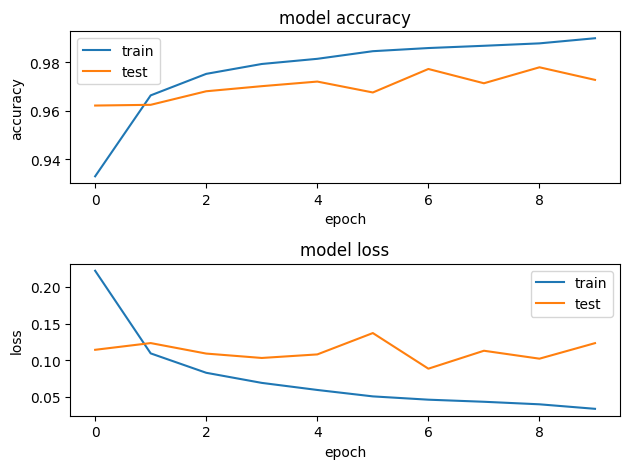

In [56]:
# summarize history for accuracy
plt.subplot(211)
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])

# summarize history for loss
plt.subplot(212)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.tight_layout()

max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("Minimum Loss : {:.4f}".format(min_loss))
print("Loss difference : {:.4f}".format((max_loss - min_loss)))